In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
import transformers

c:\Users\asus\anaconda3\envs\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('newsCorpora.csv', sep ='\t', names = ['ID','Title','URL', 'Publisher', 'Category', 'Story', 'Hostname','Timestamp'])

In [3]:
df.head(10)

,ID,Title,URL,Publisher,Category,Story,Hostname,Timestamp
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027
5,6,Plosser: Fed May Have to Accelerate Tapering Pace,http://www.nasdaq.com/article/plosser-fed-may-...,NASDAQ,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.nasdaq.com,1394470372212
6,7,Fed's Plosser: Taper pace may be too slow,http://www.marketwatch.com/story/feds-plosser-...,MarketWatch,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.marketwatch.com,1394470372405
7,8,Fed's Plosser expects US unemployment to fall ...,http://www.fxstreet.com/news/forex-news/articl...,FXstreet.com,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.fxstreet.com,1394470372615
8,9,US jobs growth last month hit by weather:Fed P...,http://economictimes.indiatimes.com/news/inter...,Economic Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,economictimes.indiatimes.com,1394470372792
9,10,ECB unlikely to end sterilisation of SMP purch...,http://www.iii.co.uk/news-opinion/reuters/news...,Interactive Investor,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.iii.co.uk,1394470501265


In [4]:
df.describe()

,ID,Timestamp
count,422419.000000,4.224190e+05
mean,211536.764594,1.400445e+12
std,122102.839707,3.733088e+09
min,1.000000,1.394470e+12
25%,105801.500000,1.397349e+12
50%,211655.000000,1.399990e+12
75%,317273.500000,1.403775e+12
max,422937.000000,1.409229e+12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422419 entries, 0 to 422418
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ID         422419 non-null  int64 
 1   Title      422419 non-null  object
 2   URL        422419 non-null  object
 3   Publisher  422417 non-null  object
 4   Category   422419 non-null  object
 5   Story      422419 non-null  object
 6   Hostname   422419 non-null  object
 7   Timestamp  422419 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 25.8+ MB


In [6]:
df.isnull().sum()

ID           0
Title        0
URL          0
Publisher    2
Category     0
Story        0
Hostname     0
Timestamp    0
dtype: int64

In [7]:
df['Category'].unique()

array(['b', 't', 'e', 'm'], dtype=object)

In [8]:
work_df = df.copy()

In [9]:
work_df = work_df[['Title','Category']]

In [10]:
work_df.head()

,Title,Category
0,"Fed official says weak data caused by weather,...",b
1,Fed's Charles Plosser sees high bar for change...,b
2,US open: Stocks fall after Fed official hints ...,b
3,"Fed risks falling 'behind the curve', Charles ...",b
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b


In [11]:
dict = {'b':'Business', 't':'Science', 'e':'Entertainment', 'm':'Health'
      
    }

In [12]:
def update_category(x):
    return dict[x]

In [13]:
work_df['Category'] = work_df['Category'].apply(lambda x: update_category(x))

In [14]:
work_df.head()

,Title,Category
0,"Fed official says weak data caused by weather,...",Business
1,Fed's Charles Plosser sees high bar for change...,Business
2,US open: Stocks fall after Fed official hints ...,Business
3,"Fed risks falling 'behind the curve', Charles ...",Business
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,Business


In [15]:
type(work_df)

pandas.core.frame.DataFrame

In [16]:
import random

def get_random_title_by_category(category):
    filtered_df = work_df[work_df['Category']==category]
    return filtered_df['Title'].sample().values[0]

In [17]:
category = 'Health'
randome_title = get_random_title_by_category(category)
print(randome_title)

Chikungunya hits Gloucester, Burlington counties


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

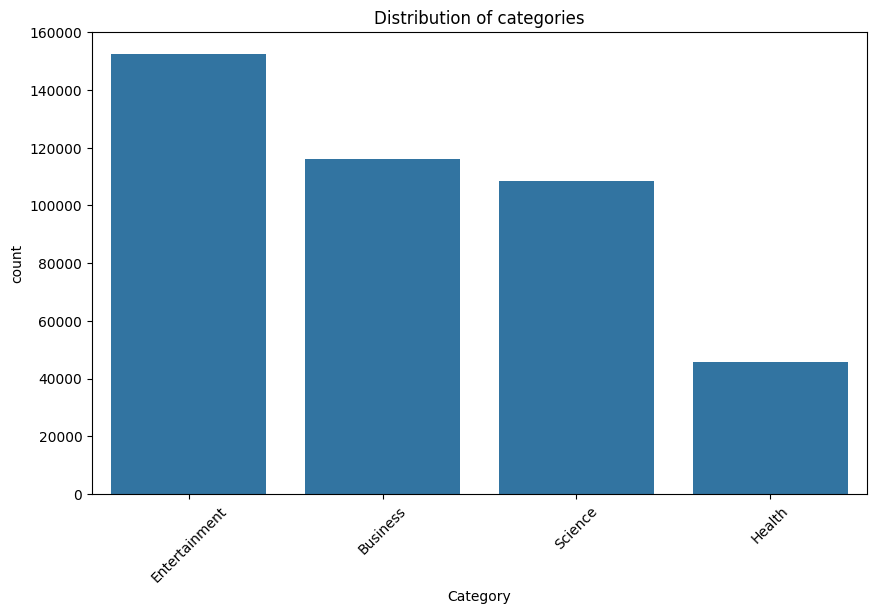

In [19]:
plt.figure(figsize = (10,6))
sns.countplot(data=work_df,x='Category',order=work_df['Category'].value_counts().index)
plt.title('Distribution of categories')
plt.xticks(rotation=45)
plt.show()

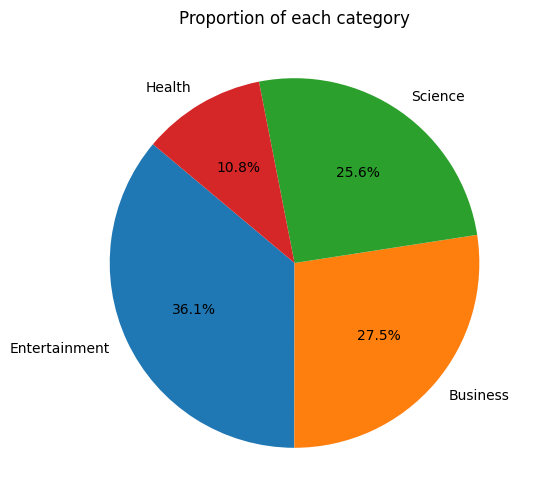

In [20]:
category_count = work_df['Category'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(category_count,labels=category_count.index,autopct='%1.1f%%',startangle=140)
plt.title('Proportion of each category')
plt.show()